# Market Segmentation with Neural Networks

#### Table of content
* Introduction
* Exploratory Data Analysis 
* Data preprocessing 
* Build model by Neural Networks by tensorflow
* Conclusions



######  Introduction : Dataset : E-Commerce Dataset  actual transactions from UK retailer 

In [1]:
# import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
e_comer=pd.read_csv('data.csv',encoding = 'unicode_escape')
e_comer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df=e_comer.copy()

## EDA

In [4]:
#the shape of dataset
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# the names of columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### check data types of columns in dataset

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### check missing values in columns 

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Insight : there are missing values in Description , CustomerID

### Delete missing values from columns

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### check duplicated values 

In [11]:
df.duplicated().sum()

5225

### Delete  duplicated values

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

##### Insight : data without missing values and duplicated values and prepare for analysis

### convert  InvoiceDate  column to datetime 

In [14]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

### How many orders that canceled?

In [15]:
df['InvoiceNo'].str.contains('C').count()

401604

### Delete Canceled orders and show data without it

In [16]:
df[~ df['InvoiceNo'].str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### choose the data has Quantity greater than zero

In [17]:
df=df[df['Quantity']> 0 ]

#### choose the data has UnitPrice greater than zero

In [18]:
df=df[df['UnitPrice'] >0]

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392692.0,13.119702,180.492832,1.000,2.00,6.00,12.00,80995.00
UnitPrice,392692.0,3.125914,22.241836,0.001,1.25,1.95,3.75,8142.75
CustomerID,392692.0,15287.843865,1713.539549,12346.000,13955.00,15150.00,16791.00,18287.00


In [21]:
df['Description'].value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
SPOTTY BUNTING                        1014
PAPER CHAIN KIT 50'S CHRISTMAS        1003
LUNCH BAG SPACEBOY DESIGN              993
HEART OF WICKER SMALL                  979
LUNCH BAG CARS BLUE                    977
NATURAL SLATE HEART CHALKBOARD         972
LUNCH BAG PINK POLKADOT                941
LUNCH BAG SUKI DESIGN                  915
REX CASH+CARRY JUMBO SHOPPER           897
ALARM CLOCK BAKELIKE RED               886
Name: Description, dtype: int64

In [22]:
df.groupby('Description').agg({'Quantity':'sum'})

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,138
50'S CHRISTMAS GIFT BAG LARGE,1885
DOLLY GIRL BEAKER,2394
I LOVE LONDON MINI BACKPACK,359
I LOVE LONDON MINI RUCKSACK,1
...,...
ZINC T-LIGHT HOLDER STARS SMALL,4894
ZINC TOP 2 DOOR WOODEN SHELF,10
ZINC WILLIE WINKIE CANDLE STICK,2606


### visualization 

### Q: what counts of Quantity based on UnitPrice

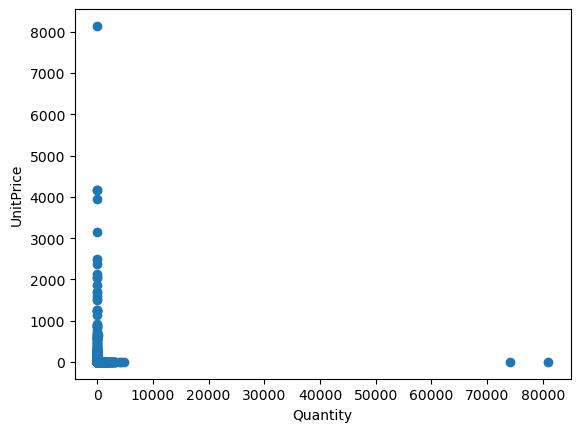

In [23]:
plt.scatter(x=df['Quantity'],y=df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

#### Insight : there are the most Quantity  in range 1,10000 of UnitPrice 

### Q : what value counts of each country 

In [24]:
df_country=pd.DataFrame(df['Country'].value_counts()).T
df_country

,United Kingdom,Germany,France,EIRE,Spain,Netherlands,Belgium,Switzerland,Portugal,Australia,...,Malta,United Arab Emirates,European Community,RSA,Lebanon,Lithuania,Brazil,Czech Republic,Bahrain,Saudi Arabia
Country,349203,9025,8326,7226,2479,2359,2031,1841,1453,1181,...,112,68,60,57,45,35,32,25,17,9


#### Q : what UnitPrice in each Country ?

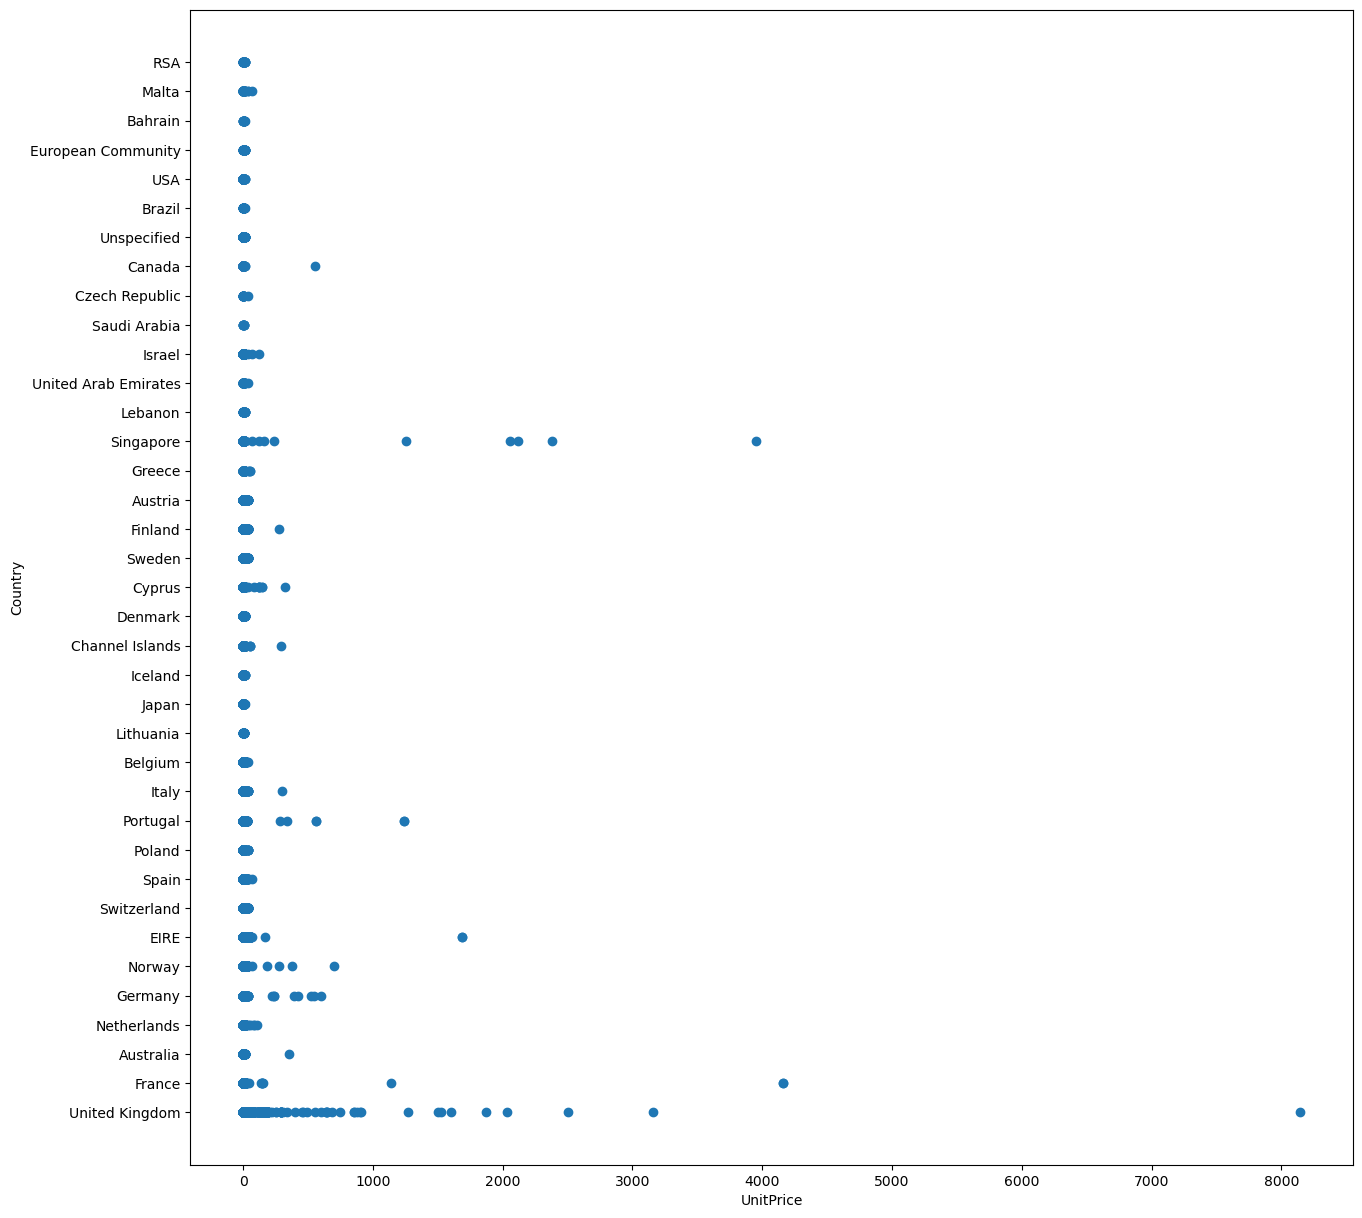

In [25]:
plt.figure(figsize=(15,15))
plt.scatter(df['UnitPrice'],df['Country'])
plt.xlabel('UnitPrice')
plt.ylabel('Country')
plt.show()

#### Insight : from this plot ,there are diffrent unit price in each country but the most two country United Kingdom , Singapore

#### Q : what is the most country that orderd from it ?

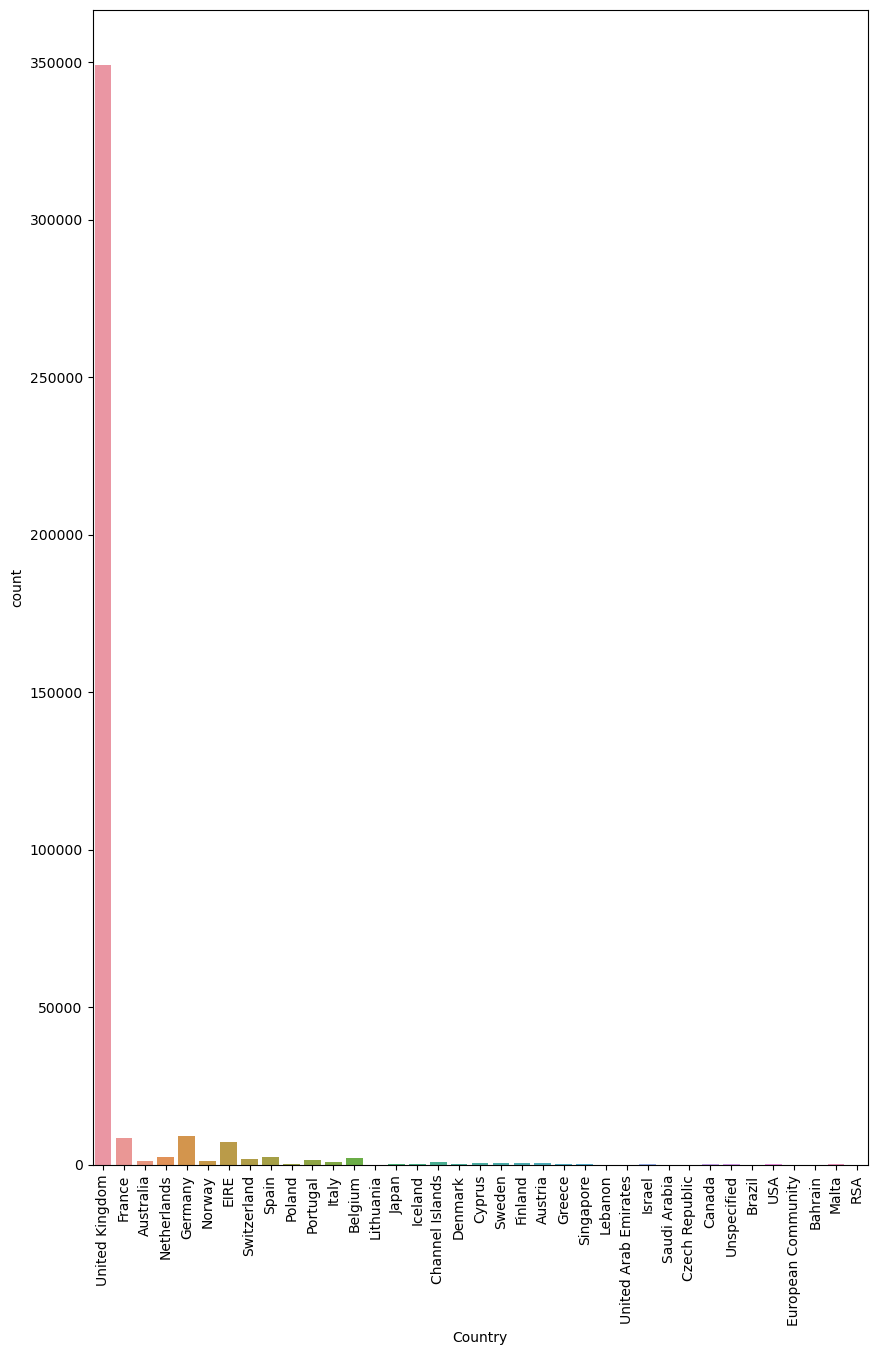

In [26]:
plt.figure(figsize=(10,15))
sns.countplot(x=df['Country'],data=df)
plt.xticks(rotation=90)
plt.show()

#### Insight : the most country that orderd from it : United Kingdom

###  Outlier Detection

In [27]:
df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

### Remove outlier from data 

In [28]:
q1 = np.percentile(df['UnitPrice'], 25)
q3 = np.percentile(df['UnitPrice'], 75)
iqr = q3 - q1
min_range=q1 - 1.5 * iqr
max_range=q3 + 1.5 * iqr

df = df[(df['UnitPrice'] >= min_range) & (df['UnitPrice'] <= max_range)]

##### Insight :  Any data  outside the range of min_range  and max_range  is outlier  and this method to remove it from data

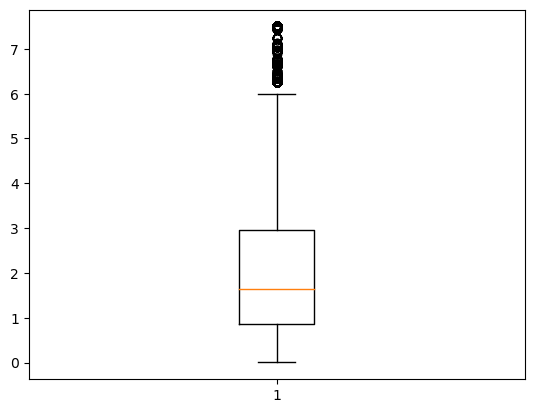

In [29]:
plt.boxplot(df['UnitPrice'])
plt.show()

#### Now ,the outlier deleted from data 

#### correlation matrix for columns

<Axes: >

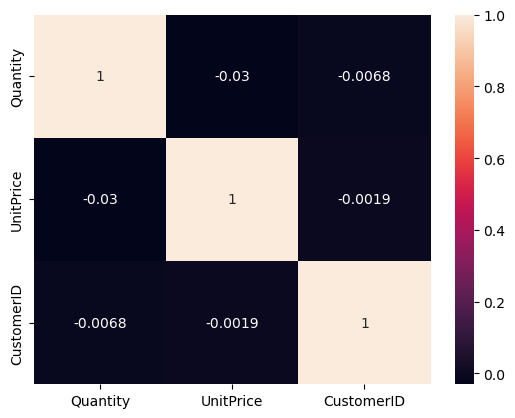

In [30]:
figsize=(15,15)
sns.heatmap(df.corr(),annot=True)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
df.drop(['InvoiceNo','Description','CustomerID','InvoiceDate'],axis=1,inplace=True)
df

,StockCode,Quantity,UnitPrice,Country
0,85123A,6,2.55,United Kingdom
1,71053,6,3.39,United Kingdom
2,84406B,8,2.75,United Kingdom
3,84029G,6,3.39,United Kingdom
4,84029E,6,3.39,United Kingdom
...,...,...,...,...
541904,22613,12,0.85,France
541905,22899,6,2.10,France
541906,23254,4,4.15,France
541907,23255,4,4.15,France


#### Encoding for categorical features 

In [33]:
cat_features=df.select_dtypes(include='object').columns

In [34]:
lb=LabelEncoder()
for col in cat_features: 
    df[col]=lb.fit_transform(df[col])

In [35]:
df

,StockCode,Quantity,UnitPrice,Country
0,3042,6,2.55,35
1,2486,6,3.39,35
2,2684,8,2.75,35
3,2636,6,3.39,35
4,2635,6,3.39,35
...,...,...,...,...
541904,1412,12,0.85,13
541905,1647,6,2.10,13
541906,1964,4,4.15,13
541907,1965,4,4.15,13


## scaling for data 

In [36]:
x=df.drop('Country',axis=1)
y=df['Country']

In [37]:
scl=StandardScaler()
columns=x.columns
x=scl.fit_transform(x)
x=pd.DataFrame(x,columns=columns)


In [38]:
x

,StockCode,Quantity,UnitPrice
0,1.998729,-0.042753,0.269377
1,1.290377,-0.042753,0.816307
2,1.542632,-0.032162,0.399598
3,1.481479,-0.042753,0.816307
4,1.480205,-0.042753,0.816307
...,...,...,...
358575,-0.077915,-0.010980,-0.837504
358576,0.221479,-0.042753,-0.023621
358577,0.625341,-0.053344,1.311148
358578,0.626615,-0.053344,1.311148


In [39]:
y

0         35
1         35
2         35
3         35
4         35
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Name: Country, Length: 358580, dtype: int32

### Split data  to train and test 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('x train shape ',x_train.shape)
print('y train shape ',y_train.shape)
print('x test shape ',x_test.shape)
print('y test shape ',y_test.shape)

x train shape  (251006, 3)
y train shape  (251006,)
x test shape  (107574, 3)
y test shape  (107574,)


### Build NN model using tensorflow

In [41]:
from tensorflow.keras.layers import  Dropout

In [42]:
model=Sequential()
model.add(layers.Dense(70,activation='tanh',input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1,activation='linear'))
          

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 70)             140       
                                                                 
 dropout (Dropout)           (None, 3, 70)             0         
                                                                 
 dense_1 (Dense)             (None, 3, 10)             710       
                                                                 
 dense_2 (Dense)             (None, 3, 1)              11        
                                                                 
Total params: 861 (3.36 KB)
Trainable params: 861 (3.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='mean_squared_error')


In [45]:
#  i use this method to reduce time of training for model
from keras.callbacks import ModelCheckpoint, EarlyStopping
EarlyStopping(monitor='loss', patience=2)
history = model.fit(
    x_train,
    y_train,
    epochs= 100,
    validation_split= 0.3,
    batch_size= 50,
    verbose= "auto",

)

Epoch 1/100
3515/3515 [==============================] - 23s 6ms/step - loss: 497.4362 - val_loss: 45.0654
Epoch 2/100
3515/3515 [==============================] - 23s 6ms/step - loss: 60.1123 - val_loss: 44.2743
Epoch 3/100
3515/3515 [==============================] - 22s 6ms/step - loss: 58.1872 - val_loss: 44.1154
Epoch 4/100
3515/3515 [==============================] - 17s 5ms/step - loss: 57.0722 - val_loss: 44.1723
Epoch 5/100
3515/3515 [==============================] - 18s 5ms/step - loss: 56.3837 - val_loss: 43.8932
Epoch 6/100
3515/3515 [==============================] - 23s 6ms/step - loss: 55.5760 - val_loss: 43.9364
Epoch 7/100
3515/3515 [==============================] - 23s 6ms/step - loss: 54.9401 - val_loss: 43.9735
Epoch 8/100
3515/3515 [==============================] - 21s 6ms/step - loss: 54.3437 - val_loss: 43.8104
Epoch 9/100
3515/3515 [==============================] - 21s 6ms/step - loss: 53.7681 - val_loss: 43.9478
Epoch 10/100
3515/3515 [=====================

3515/3515 [==============================] - 21s 6ms/step - loss: 43.6969 - val_loss: 43.7584
Epoch 78/100
3515/3515 [==============================] - 21s 6ms/step - loss: 43.6965 - val_loss: 43.7578
Epoch 79/100
3515/3515 [==============================] - 21s 6ms/step - loss: 43.6944 - val_loss: 43.7551
Epoch 80/100
3515/3515 [==============================] - 21s 6ms/step - loss: 43.6932 - val_loss: 43.7537
Epoch 81/100
3515/3515 [==============================] - 22s 6ms/step - loss: 43.6913 - val_loss: 43.7517
Epoch 82/100
3515/3515 [==============================] - 21s 6ms/step - loss: 43.6878 - val_loss: 43.7527
Epoch 83/100
3515/3515 [==============================] - 23s 6ms/step - loss: 43.6869 - val_loss: 43.7476
Epoch 84/100
3515/3515 [==============================] - 22s 6ms/step - loss: 43.6841 - val_loss: 43.7473
Epoch 85/100
3515/3515 [==============================] - 22s 6ms/step - loss: 43.6852 - val_loss: 43.7459
Epoch 86/100
3515/3515 [==========================

In [46]:
# model.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=100)

In [53]:
preds

array([33.104862, 33.064144, 33.016224, ..., 32.69466 , 33.09126 ,
       32.964436], dtype=float32)

In [60]:
preds=model.predict(x_test).reshape(-1,)[0]

result=pd.DataFrame()
result['actual']=y_test.values
result['Preds']=preds



3362/3362 [==============================] - 11s 3ms/step


In [61]:
result

,actual,Preds
0,35,33.104862
1,35,33.104862
2,35,33.104862
3,35,33.104862
4,35,33.104862
...,...,...
107569,35,33.104862
107570,35,33.104862
107571,35,33.104862
107572,35,33.104862


In [ ]:
# accurracy  of model

# acurracy_of_test=model.evaluate(x_test,y_test)
# print(f'Test Accuracy: ',acurracy_of_test )


# # from sklearn.metrics import r2_score
# # r2_score(y_test,preds)